# Random Forest

# Exercise

1. Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.
2. Measure prediction score using default n_estimators
3. Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

Let's load the iris flower dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

## Understand the dataset
1. iris.DESCR > Complete description of dataset
2. iris.data > Data to learn. Each training set is 4 digit array of features. Total 150 training sets
3. iris.feature_names > Array of all 4 feature ['sepal length (cm)','sepal width cm)','petal length (cm)','petal width (cm)']
4. iris.filename > CSV file name
5. iris.target > The classification label. For every training set there is one classification label(0,1,2). Here 0 for setosa, 1 for versicolor and 2 for virginica
6. iris.target_names > the meaning of the features. Its a array >> ['setosa', 'versicolor', 'virginica']
From above details its clear that our data is 'iris.data' and labels are 'iris.target'

Each training example in iris.data is a array of iris.feature_names lets create a dataframe

In [ ]:
# print the names of the four features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# Create dataframe using iris.data
df = pd.DataFrame(data=iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Add the target column to it

In [ ]:
# Append class / label data
df["target"] = iris.target
 
# Print the data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Split the dataframe

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Features
y=df['target']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [ ]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
print("len of X_train is %s" % (len(X_train)))
print("len of X_test is %s" % (len(X_test)))
print("len of y_train is %s" % (len(y_train)))
print("len of y_test is %s" % (len(y_test)))

len of X_train is 105
len of X_test is 45
len of y_train is 105
len of y_test is 45


## Train the model with Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model.score(X_train,y_train)

1.0

In [ ]:
model.score(X_test,y_test)

0.9333333333333333

In [ ]:
from sklearn.metrics import accuracy_score
y_predicted = model.predict(X_test)
accuracy_score(y_test, y_predicted)

0.9333333333333333

Let's try with n_estimators=5

In [ ]:
model = RandomForestClassifier(n_estimators=5)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model.score(X_train,y_train)

1.0

In [ ]:
model.score(X_test,y_test)

0.8888888888888888

Confusion matrix

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.8888888888888888

In [ ]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_predicted)
cm

array([[15,  0,  0],
       [ 0, 16,  2],
       [ 0,  3,  9]])

Text(69.0, 0.5, 'Truth')

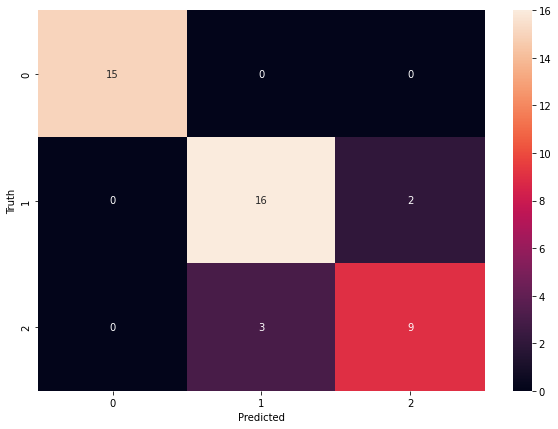

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.84      0.89      0.86        18
           2       0.82      0.75      0.78        12

    accuracy                           0.89        45
   macro avg       0.89      0.88      0.88        45
weighted avg       0.89      0.89      0.89        45

